In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
path = 'Datasets'
players_dataset = pd.read_csv(path + '/OldData.csv',encoding="ISO-8859-1")
players_dataset.head()

,sofifa_id;name;nationality;position;overall;age;hits;potential;team
0,158023;Lionel Messi;Argentina;ST|CF|RW;94;33;2...
1,20801;Cristiano Ronaldo;Portugal;ST|LW;93;35;2...
2,190871;Neymar Jr;Brazil;CAM|LW;92;28;186;92;Pa...
3,203376;Virgil van Dijk;Netherlands;CB;91;29;12...
4,200389;Jan Oblak;Slovenia;GK;91;27;47;93;Atlét...


In [3]:
def get_sofifa_id(sofifa_id):
    return sofifa_id.split(';')[0].strip(' ')
def get_name(name):
    return name.split(';')[1].strip(' ')
def get_nationality(nationality):
    return nationality.split(';')[2].strip(' ')
def get_position(position):
    return position.split(';')[3].strip(' ')
def get_overall(overall):
    return overall.split(';')[4].strip(' ')
def get_age(age):
    return age.split(';')[5].strip(' ')
def get_hits(hits):
    return hits.split(';')[6].strip(' ')
def get_potential(potential):
    return potential.split(';')[7].strip(' ')
def get_team(team):
    return team.split(';')[8].strip(' ')
def get_first_position(position):
    return position.split('|')[0].strip(' ')
def get_second_position(position):
    if len(position.split('|'))>=2:
        return position.split('|')[1].strip(' ')
    else:
        return ''
def get_third_position(position):
    if len(position.split('|'))>=3:
        return position.split('|')[2].strip(' ')
    else:
        return ''

In [5]:
allColumns = 'sofifa_id;name;nationality;position;overall;age;hits;potential;team'
players_dataset['sofifa_id'] = players_dataset[allColumns].apply(get_sofifa_id)
players_dataset['name'] = players_dataset[allColumns].apply(get_name)
players_dataset['nationality'] = players_dataset[allColumns].apply(get_nationality)
players_dataset['position'] = players_dataset[allColumns].apply(get_position)
players_dataset['first_position'] = players_dataset['position'].apply(get_first_position)
players_dataset['second_position'] = players_dataset['position'].apply(get_second_position)
players_dataset['third_position'] = players_dataset['position'].apply(get_third_position)
players_dataset = players_dataset.drop({'position'},axis = 1)
players_dataset['overall'] = pd.to_numeric(players_dataset[allColumns].apply(get_overall))
players_dataset['age'] = pd.to_numeric(players_dataset[allColumns].apply(get_age))
players_dataset['hits'] = pd.to_numeric(players_dataset[allColumns].apply(get_hits))
players_dataset['potential'] = pd.to_numeric(players_dataset[allColumns].apply(get_potential))
players_dataset['team'] = players_dataset[allColumns].apply(get_team)
players_dataset = players_dataset.drop({allColumns},axis = 1)
players_dataset.head()

,sofifa_id,name,nationality,first_position,second_position,third_position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST,CF,RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST,LW,,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM,LW,,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,,,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,,,91,27,47,93,Atlético Madrid


In [6]:
players_dataset.isnull().any()
print(players_dataset.shape)
players_dataset.head()

(17981, 11)


,sofifa_id,name,nationality,first_position,second_position,third_position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST,CF,RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST,LW,,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM,LW,,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,,,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,,,91,27,47,93,Atlético Madrid


In [7]:
players_dataset.to_csv('Datasets/NewdataSet.csv')

In [8]:
from TeamClass import Team
name = 'Liverpool'
players_team = players_dataset[players_dataset.team == name]
team = Team(players_team)
team.fit()

In [42]:
from TeamClass import Team
teams_DataSet = pd.DataFrame()
tmpData = pd.DataFrame()
for i in range(5):
    name = teams.iloc[i]
    players_team = players_dataset[players_dataset.team == name]
    myteam = Team(players_team)
    myteam.fit()
    print(name)
    tmpData = pd.DataFrame({'team':name, 'overall':[myteam.team_optimium.overall.mean()], 'potential':[myteam.team_optimium.potential.mean()]});
    teams_DataSet = teams_DataSet.append(tmpData)
teams_DataSet

NameError: name 'teams' is not defined

In [44]:
path = 'Datasets'
players_dataset2 = pd.read_csv(path + '/players_20.csv',encoding="ISO-8859-1")
players_dataset2.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel AndrÃ©s Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,AtlÃ©tico Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [45]:
players_dataset2 = players_dataset2.drop({'player_url'},axis = 1)
players_dataset2 = players_dataset2.drop({'long_name'},axis = 1)
players_dataset2 = players_dataset2.drop({'dob'},axis = 1)
players_dataset2 = players_dataset2.drop({'lwb'},axis = 1)
players_dataset2 = players_dataset2.drop({'ldm'},axis = 1)
players_dataset2 = players_dataset2.drop({'cdm'},axis = 1)
players_dataset2 = players_dataset2.drop({'rdm'},axis = 1)
players_dataset2 = players_dataset2.drop({'rwb'},axis = 1)
players_dataset2 = players_dataset2.drop({'lb'},axis = 1)
players_dataset2 = players_dataset2.drop({'lcb'},axis = 1)
players_dataset2 = players_dataset2.drop({'cam'},axis = 1)
players_dataset2 = players_dataset2.drop({'ram'},axis = 1)
players_dataset2 = players_dataset2.drop({'lm'},axis = 1)
players_dataset2 = players_dataset2.drop({'lcm'},axis = 1)
players_dataset2 = players_dataset2.drop({'cm'},axis = 1)
players_dataset2 = players_dataset2.drop({'rm'},axis = 1)
players_dataset2 = players_dataset2.drop({'rcm'},axis = 1)
players_dataset2 = players_dataset2.drop({'cb'},axis = 1)
players_dataset2 = players_dataset2.drop({'rcb'},axis = 1)
players_dataset2 = players_dataset2.drop({'rb'},axis = 1)
players_dataset2 = players_dataset2.drop({'ls'},axis = 1)
players_dataset2 = players_dataset2.drop({'st'},axis = 1)
players_dataset2 = players_dataset2.drop({'rs'},axis = 1)
players_dataset2 = players_dataset2.drop({'lw'},axis = 1)
players_dataset2 = players_dataset2.drop({'lf'},axis = 1)
players_dataset2 = players_dataset2.drop({'cf'},axis = 1)
players_dataset2 = players_dataset2.drop({'rf'},axis = 1)
players_dataset2 = players_dataset2.drop({'rw'},axis = 1)
players_dataset2 = players_dataset2.drop({'lam'},axis = 1)
players_dataset2 = players_dataset2.drop({'player_positions'},axis = 1)
players_dataset2 = players_dataset2.drop({'weak_foot'},axis = 1)
players_dataset2 = players_dataset2.drop({'body_type'},axis = 1)
players_dataset2 = players_dataset2.drop({'skill_moves'},axis = 1)
players_dataset2 = players_dataset2.drop({'real_face'},axis = 1)
players_dataset2 = players_dataset2.drop({'work_rate'},axis = 1)
players_dataset2 = players_dataset2.drop({'player_tags'},axis = 1)
players_dataset2 = players_dataset2.drop({'team_position'},axis = 1)
players_dataset2 = players_dataset2.drop({'joined'},axis = 1)
players_dataset2 = players_dataset2.drop({'nation_position'},axis = 1)
players_dataset2 = players_dataset2.drop({'nation_jersey_number'},axis = 1)
players_dataset2 = players_dataset2.drop({'pace'},axis = 1)
players_dataset2 = players_dataset2.drop({'gk_diving'},axis = 1)
players_dataset2 = players_dataset2.drop({'gk_handling'},axis = 1)
players_dataset2 = players_dataset2.drop({'gk_kicking'},axis = 1)
players_dataset2 = players_dataset2.drop({'gk_reflexes'},axis = 1)
players_dataset2 = players_dataset2.drop({'gk_speed'},axis = 1)
players_dataset2 = players_dataset2.drop({'gk_positioning'},axis = 1)
players_dataset2 = players_dataset2.drop({'player_traits'},axis = 1)
players_dataset2 = players_dataset2.drop({'attacking_heading_accuracy'},axis = 1)
players_dataset2 = players_dataset2.drop({'attacking_short_passing'},axis = 1)
players_dataset2 = players_dataset2.drop({'attacking_volleys'},axis = 1)
players_dataset2 = players_dataset2.drop({'skill_curve'},axis = 1)
players_dataset2 = players_dataset2.drop({'skill_fk_accuracy'},axis = 1)
players_dataset2 = players_dataset2.drop({'skill_long_passing'},axis = 1)
players_dataset2 = players_dataset2.drop({'movement_acceleration'},axis = 1)
players_dataset2 = players_dataset2.drop({'movement_sprint_speed'},axis = 1)
players_dataset2 = players_dataset2.drop({'movement_agility'},axis = 1)
players_dataset2 = players_dataset2.drop({'movement_reactions'},axis = 1)
players_dataset2 = players_dataset2.drop({'movement_balance'},axis = 1)
players_dataset2 = players_dataset2.drop({'power_shot_power'},axis = 1)
players_dataset2 = players_dataset2.drop({'power_jumping'},axis = 1)
players_dataset2 = players_dataset2.drop({'power_stamina'},axis = 1)
players_dataset2 = players_dataset2.drop({'power_strength'},axis = 1)
players_dataset2 = players_dataset2.drop({'power_long_shots'},axis = 1)
players_dataset2 = players_dataset2.drop({'mentality_interceptions'},axis = 1)
players_dataset2 = players_dataset2.drop({'mentality_aggression'},axis = 1)
players_dataset2 = players_dataset2.drop({'mentality_positioning'},axis = 1)
players_dataset2 = players_dataset2.drop({'mentality_vision'},axis = 1)
players_dataset2 = players_dataset2.drop({'mentality_penalties'},axis = 1)
players_dataset2 = players_dataset2.drop({'mentality_composure'},axis = 1)
players_dataset2 = players_dataset2.drop({'defending_marking'},axis = 1)
players_dataset2 = players_dataset2.drop({'defending_standing_tackle'},axis = 1)
players_dataset2 = players_dataset2.drop({'defending_sliding_tackle'},axis = 1)
players_dataset2 = players_dataset2.drop({'goalkeeping_diving'},axis = 1)
players_dataset2 = players_dataset2.drop({'goalkeeping_handling'},axis = 1)
players_dataset2 = players_dataset2.drop({'goalkeeping_kicking'},axis = 1)
players_dataset2 = players_dataset2.drop({'goalkeeping_positioning'},axis = 1)
players_dataset2 = players_dataset2.drop({'goalkeeping_reflexes'},axis = 1)
players_dataset2 = players_dataset2.drop({'skill_dribbling'},axis = 1)
players_dataset2 = players_dataset2.drop({'skill_ball_control'},axis = 1)
players_dataset2 = players_dataset2.drop({'attacking_crossing'},axis = 1)
players_dataset2 = players_dataset2.drop({'attacking_finishing'},axis = 1)

In [46]:
players_dataset2.sofifa_id = players_dataset2.sofifa_id.astype(int)
players_dataset.sofifa_id = players_dataset.sofifa_id.astype(int)
players = pd.merge(players_dataset,players_dataset2,on='sofifa_id')
players.value_eur = players.value_eur.astype(float)/1000000
players.wage_eur = players.wage_eur.astype(float)/1000
players.shape


(14977, 32)

In [47]:
players = players.drop({'nationality_y'},axis = 1)
players = players.drop({'overall_y'},axis = 1)
players = players.drop({'age_y'},axis = 1)
players = players.drop({'potential_y'},axis = 1)
players = players.drop({'name'},axis = 1)
players['name'] = players.short_name
players = players.drop({'short_name'},axis = 1)
players['age'] = players.age_x
players = players.drop({'age_x'},axis = 1)
players['nationality'] = players.nationality_x
players = players.drop({'nationality_x'},axis = 1)
players['potential'] = players.potential_x
players = players.drop({'potential_x'},axis = 1)
players['overall'] = players.overall_x
players = players.drop({'overall_x'},axis = 1)
players['team'] = players.club
players = players.drop({'club'},axis = 1)
players

,sofifa_id,first_position,second_position,third_position,hits,team,height_cm,weight_kg,value_eur,wage_eur,...,shooting,passing,dribbling,defending,physic,name,age,nationality,potential,overall
0,158023,ST,CF,RW,299,FC Barcelona,170,72,95.50,565.0,...,92.0,92.0,96.0,39.0,66.0,L. Messi,33,Argentina,94,94
1,20801,ST,LW,,276,Juventus,187,83,58.50,405.0,...,93.0,82.0,89.0,35.0,78.0,Cristiano Ronaldo,35,Portugal,93,93
2,190871,CAM,LW,,186,Paris Saint-Germain,175,68,105.50,290.0,...,85.0,87.0,95.0,32.0,58.0,Neymar Jr,28,Brazil,92,92
3,203376,CB,,,127,Liverpool,193,92,78.00,200.0,...,60.0,70.0,71.0,90.0,86.0,V. van Dijk,29,Netherlands,92,91
4,200389,GK,,,47,AtlÃ©tico Madrid,188,87,77.50,125.0,...,NaN,NaN,NaN,NaN,NaN,J. Oblak,27,Slovenia,93,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14972,182352,LM,CM,CAM,1,Henan Jianye FC,179,73,0.08,2.0,...,58.0,56.0,58.0,53.0,65.0,Li Benjian,34,China PR,57,57
14973,175603,GK,,,0,Bristol City,197,101,0.06,5.0,...,NaN,NaN,NaN,NaN,NaN,R. Gilmartin,33,Republic of Ireland,57,57
14974,149662,CB,,,0,Cork City,188,85,0.03,1.0,...,26.0,31.0,29.0,59.0,63.0,A. Bennett,38,Republic of Ireland,57,57
14975,138083,RB,CB,,0,Crewe Alexandra,185,86,0.02,2.0,...,44.0,50.0,51.0,57.0,74.0,N. Hunt,36,England,57,57


In [334]:
players.to_csv('Datasets/OficialDataSet2020.csv')

In [48]:
from TeamClass import Team
name = 'Paris Saint-Germain'
players2 = players[players.team == name]
team = Team(players2)
team.fit()

In [49]:
team.team_optimium

,sofifa_id,first_position,second_position,third_position,hits,team,height_cm,weight_kg,value_eur,wage_eur,...,shooting,passing,dribbling,defending,physic,name,age,nationality,potential,overall
287,193105,GK,,,18,Paris Saint-Germain,195,94,21.0,71.0,...,NaN,NaN,NaN,NaN,NaN,A. Areola,27,France,86,82
350,205069,LB,LM,,24,Paris Saint-Germain,170,67,16.0,75.0,...,61.0,78.0,85.0,74.0,66.0,Bernat,27,Spain,82,81
361,202371,RB,RM,,29,Paris Saint-Germain,191,90,20.0,87.0,...,75.0,77.0,75.0,78.0,84.0,T. Meunier,28,Belgium,81,81
54,164240,CB,,,28,Paris Saint-Germain,183,82,18.5,135.0,...,54.0,72.0,72.0,87.0,78.0,Thiago Silva,35,Brazil,87,87
66,207865,CB,CDM,,48,Paris Saint-Germain,183,75,51.5,120.0,...,41.0,73.0,70.0,86.0,77.0,Marquinhos,26,Brazil,90,86
2,190871,CAM,LW,,186,Paris Saint-Germain,175,68,105.5,290.0,...,85.0,87.0,95.0,32.0,58.0,Neymar Jr,28,Brazil,92,92
40,199556,CDM,CM,,45,Paris Saint-Germain,165,60,54.5,140.0,...,60.0,84.0,90.0,79.0,66.0,M. Verratti,27,Italy,88,87
137,193474,CDM,CM,,30,Paris Saint-Germain,174,66,22.0,100.0,...,59.0,70.0,78.0,85.0,78.0,I. Gueye,30,Senegal,84,84
2,190871,CAM,LW,,186,Paris Saint-Germain,175,68,105.5,290.0,...,85.0,87.0,95.0,32.0,58.0,Neymar Jr,28,Brazil,92,92
13,231747,ST,RW,LW,222,Paris Saint-Germain,178,73,93.5,155.0,...,84.0,78.0,90.0,39.0,75.0,K. MbappÃ©,21,France,95,89


In [62]:
f = players.shooting.mean()
f

53.3348538099155

In [65]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [110]:
def searchJuanTeam(team,pos):
    Juan = team[team.first_position == pos][team.potential==team.potential[team.first_position == pos].min()]
    return Juan

<AxesSubplot:xlabel='first_position', ylabel='potential'>

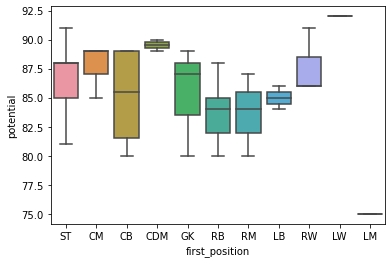

In [119]:
name = 'Real Madrid'
players2 = players[players.team == name]
y = players2.potential
x = players2.first_position
sns.boxplot(x,y)

In [120]:
pos = 'LM'
manco = searchJuanTeam(players2,pos)
manco[['name','first_position','potential','wage_eur']]

,name,first_position,potential,wage_eur
8610,Fidalgo,LM,75,27.0


<AxesSubplot:xlabel='first_position', ylabel='potential'>

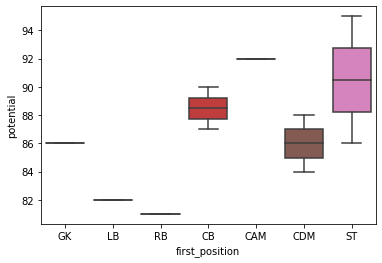

In [76]:
name = 'Paris Saint-Germain'
players3 = players[players.team == name]
team = Team(players3)
team.fit()
y = team.team_optimium.potential
x = team.team_optimium.first_position
sns.boxplot(x,y)

In [94]:
players2.potential[players2.first_position == 'CB'].min()

78